In [4]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
# **Reading each file in the BrokenTooth and Healthy directories and appending it to the respective lists as pandas' DataFrame object (abbr.: df)
for file_name in os.listdir(pth1):
    this_df = pd.read_csv(os.path.join(pth1, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 0
    broken.append(this_df)
    #print(this_df.head(5))
# print(broken[0].count())

# print(broken[1].head(5))
print(broken[0].describe())
# print(broken[0]['a1'].head(5))

for file_name in os.listdir(pth2):
    this_df = pd.read_csv(os.path.join(pth2, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 1
    healthy.append(this_df)
    #print(this_df.head(5))

print(healthy[1].head(5))
# print(healthy[1].describe())
# print(healthy[1]['a1'].head(5))

                 a1            a2            a3            a4     load  \
count  88320.000000  88320.000000  88320.000000  88320.000000  88320.0   
mean      -0.000654      0.008212      0.003123     -0.005046      0.0   
std        3.554499      3.922028      3.100732      3.331703      0.0   
min      -21.826000    -22.440300    -17.883600    -23.450000      0.0   
25%       -2.090257     -2.059418     -1.629943     -1.783825      0.0   
50%        0.014590      0.088157     -0.007156      0.023381      0.0   
75%        2.078990      2.216632      1.638802      1.797045      0.0   
max       19.048900     19.456800     17.179000     21.069600      0.0   

       gearbox_status  
count         88320.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0  
         a1        a2        a3        a4  load  gearbox_status
0 -0.169381 -1.282080  3.302820 -1.556990    10      

In [68]:
#time series graph - (add blocks from here)


In [5]:
# Aggregating dataset for broken and healthy 
broken_agg = broken[0]
healthy_agg = healthy[0]
for i in range(1,10):
    broken_agg = pd.concat([broken_agg, broken[i]], ignore_index=True)
    healthy_agg = pd.concat([healthy_agg, healthy[i]], ignore_index=True)

In [6]:
broken_agg.describe()

,a1,a2,a3,a4,load,gearbox_status
count,1.005311e+06,1.005311e+06,1.005311e+06,1.005311e+06,1.005311e+06,1005311.0
mean,-1.037558e-03,1.731702e-03,7.305638e-04,1.339568e-03,4.547998e+01,0.0
std,4.602696e+00,4.389516e+00,3.808909e+00,4.408367e+00,2.900204e+01,0.0
min,-2.534610e+01,-3.250230e+01,-2.585610e+01,-2.739530e+01,0.000000e+00,0.0
25%,-2.771530e+00,-2.469080e+00,-2.030490e+00,-2.365505e+00,2.000000e+01,0.0
50%,-5.425910e-02,1.257260e-01,4.504200e-02,1.012820e-01,5.000000e+01,0.0
75%,2.668080e+00,2.679470e+00,2.104100e+00,2.444225e+00,7.000000e+01,0.0
max,2.637010e+01,2.467780e+01,2.693890e+01,3.236610e+01,9.000000e+01,0.0


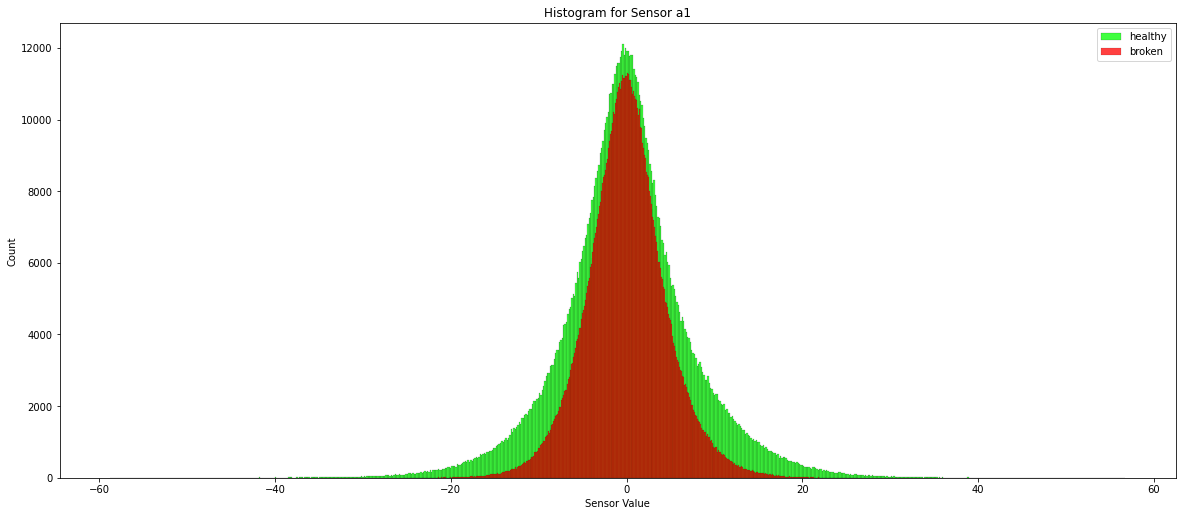

                 a1            a2            a3            a4          load  \
count  1.005311e+06  1.005311e+06  1.005311e+06  1.005311e+06  1.005311e+06   
mean  -1.037558e-03  1.731702e-03  7.305638e-04  1.339568e-03  4.547998e+01   
std    4.602696e+00  4.389516e+00  3.808909e+00  4.408367e+00  2.900204e+01   
min   -2.534610e+01 -3.250230e+01 -2.585610e+01 -2.739530e+01  0.000000e+00   
25%   -2.771530e+00 -2.469080e+00 -2.030490e+00 -2.365505e+00  2.000000e+01   
50%   -5.425910e-02  1.257260e-01  4.504200e-02  1.012820e-01  5.000000e+01   
75%    2.668080e+00  2.679470e+00  2.104100e+00  2.444225e+00  7.000000e+01   
max    2.637010e+01  2.467780e+01  2.693890e+01  3.236610e+01  9.000000e+01   

       gearbox_status  
count       1005311.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0  
                 a1            a2            a3            a4          l

In [28]:
# Agregrating total dataset
# bh_agg = pd.concat([healthy_agg, broken_agg], ignore_index=True)

# a1 = bh_agg.iloc[:,:1]
plt.figure(figsize=(20,35*10))
gs = gridspec.GridSpec(35, 1)
ax = plt.subplot(gs[i])
ax.set_xlabel('Sensor Value')
ax.set_title('Histogram for Sensor a1')

# sns.distplot(a1[bh_agg.gearbox_status == 1])
# sns.distplot(a1[bh_agg.gearbox_status == 0])
sns.histplot(data=healthy_agg, x='a1', color="lime")
sns.histplot(data=broken_agg, x='a1', color="red")

plt.legend(['healthy', 'broken'])
plt.show()


In [ ]:
# import numpy as np
# import math

# # This function computes the standard deviation for a sample, where:
# ##  - df:        the dataset, one variable per column
# ##  - grouped:   the number of consecutive points (rows) in the time series to compute the standard deviation
# ##  - outcome:   column added to the dataset representing healthy(=1) or failure (=0)
# ##  RETURNS a dataset (df_result) where each column is the time serie of every variable

# def stdev_features(df, grouped, load, outcome):
#     #### Create empty dataframe with columns a1,a2,a3,a4
#     df_result = pd.DataFrame( [ np.zeros(len(df.columns)-2) ],columns= df.columns[:-2])

#     #### Aggregate in groups of nrows computing the standard deviation
#     # Remove load & failure columns, keeping only a1,a2,a3,a4
#     stdev_lenght=len(df.columns)-2
    
#     #### Compute number of rows of the aggregated dataframe
#     nrows_raw = len(df.index)
#     nrows = math.floor(nrows_raw / grouped)
#     nrows_dropped = nrows_raw - nrows*grouped
#     print("nrows_raw=", nrows_raw, "   nrows=", nrows, "   Number of dropped rows of grouped= ", nrows_dropped/grouped*100,"%\n")
    
#     # Iterate every 'grouped' rows and compute stdev per column
#     for i in range(nrows):
#         df_group = df.iloc[i*grouped:i*grouped+grouped,:]
#         df_stdev = pd.DataFrame(df_group.std()).transpose()
#         # Remove load & failure columns
#         df_stdev=df_stdev.iloc[:,:stdev_lenght]
#         # Add row of calculated stdev
#         df_result = df_result.append(df_stdev, ignore_index=True)

#         #print ("i*grouped TO i*grouped+grouped", i*grouped, i*grouped+grouped)
#         #print ("row, df_stdev=\n", row, df_stdev.iloc[:,:])
#         #print ("df_result=\n", df_result)
#         #print("row", i, "\n", df_group)


#     # Remove the first row (it was the seed of zeros for initializing df_result)
#     #print(df_result)
#     df_result = df_result.iloc[1:,:]
#     # Add the column for 'load'
#     df_result['load'] = load*np.ones((nrows,1))
#     # df_result['load'] = df['load']

#     # Add the column for 'failure'
#     failure = np.ones((nrows,1))
#     df_result['failure'] = outcome
#     print(df_result)
    
#     return df_result

# stdev_features(broken_agg, 50, 0, -1)

In [3]:
#just a test codeblock

import pandas as pd

mydf = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 6, 7, 8],
    'col2': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
})  

mydf.head(8)
mydf.describe()

,col1
count,8.00000
mean,4.50000
std,2.44949
min,1.00000
25%,2.75000
50%,4.50000
75%,6.25000
max,8.00000


In [28]:
import math

def divide_into(df, n):
    group_size = n #math.ceil(df['a1'].count()/n)
    df_groups = []
    for i in range(math.ceil(df['a1'].count()/group_size)):
        df_groups.append(df.iloc[i*group_size:(i+1)*group_size, :-2])
    return pd.DataFrame(map(pd.DataFrame.std, df_groups))

groups = divide_into(broken[0], 100)

broken_stdev = {}
for i in range(10):
    load = i*10
    broken_stdev[load] = divide_into(broken[i], 100)
print(broken_stdev)

# for i in range(10):
#     broken_stdev.append(groups)
# print(groups)

ValueError: If using all scalar values, you must pass an index